# The Kolmogorov-Smirnoff test

In this notebook we want to check wether a variable is normally distributed.

For that we use the Kolmogorov-Smirnoff test, which compares the distribution of a variable with that of a normally  distributed variable.

Let's import the necessary packages and load the dataset into a dataframe


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/auto-mpg.csv')


In [3]:
df.shape

(392, 9)

The dataframe has 392 samples of cars and the following columns:

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Let's plot the distribution of some of the variables using the seaborn library

The distribution of mpg


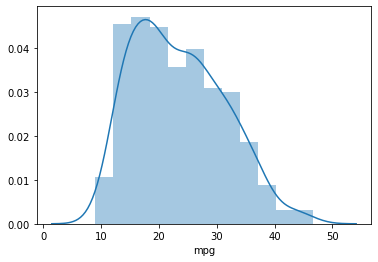

In [5]:
sns.distplot(df.mpg)

The distribution of acceleration

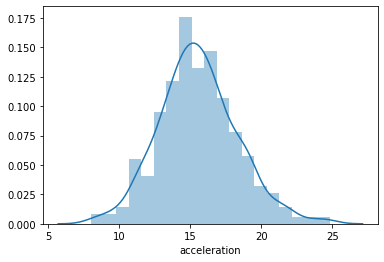

In [6]:
sns.distplot(df.acceleration)

The acceleration variable looks much closer to a normal distribution than the mpg variable does.

Before we run the Kolmogorov-Smirnof test we must **normalize** the variables

They must be centered with a standard variation of 1


In [8]:
df['mpg'] = (df.mpg - np.mean(df.mpg)) / np.std(df.mpg)
df['acceleration'] = (df.acceleration - np.mean(df.acceleration)) / np.std(df.acceleration)


Let's confirm, that this now is the case

In [10]:
df[['mpg','acceleration']].describe().loc[['mean','std']]

,mpg,acceleration
mean,-3.834801e-16,6.241039e-15
std,1.001278e+00,1.001278e+00


The Kolmogorov-Smirnof test is available from the scipy package


The null hypothesis of the Kolmogorov-Smirnof Test
is that the variable *is* normally distributed.

Let's first apply the test on the **acceleration** variable


In [13]:
from scipy import stats
stats.kstest(df.acceleration , 'norm')    

KstestResult(statistic=0.05124169272274437, pvalue=0.24668986717169575)

We have a p-value of 0.24, which is *much* larger
than the usual 0.05 threshold
so we *cannot* reject the null hypothesis.

The conclusion is that
if the underlying variable was normally distributed.
we would have a
24% chance of observing the acceleration values of our dataset

Which in fact is not a bad probability value.

Let's compare that to a variable
that is really normally distributed by design
and see which p-value we end up getting.

We can generate 500 samples of a normally distributed variable with numpy



In [14]:
x = np.random.normal(0,1, 500)

and the Kolmogorov-Smirnof test gives us

In [15]:
stats.kstest(x , 'norm')

KstestResult(statistic=0.03929830357261527, pvalue=0.4159217490262365)

A p value also higher than 0.05.

So we can basically conclude
that the acceleration variable **is** normally distributed.


Let's now look at the mpg variable
and run the kolmogorov smirnoff test on that variable


In [17]:
stats.kstest(df.mpg , 'norm')

KstestResult(statistic=0.08201816765908454, pvalue=0.00965291599282271)

With a p-value much lower than 0.05
we can reject the null hypothesis
and conclude that **the mpg variable is not normally distributed**.

To make a variable more "*normally distributed*",
we can take the log of that variable.

So let's reload the dataset,
take the log of mpg and normalize that new log_mpg variable


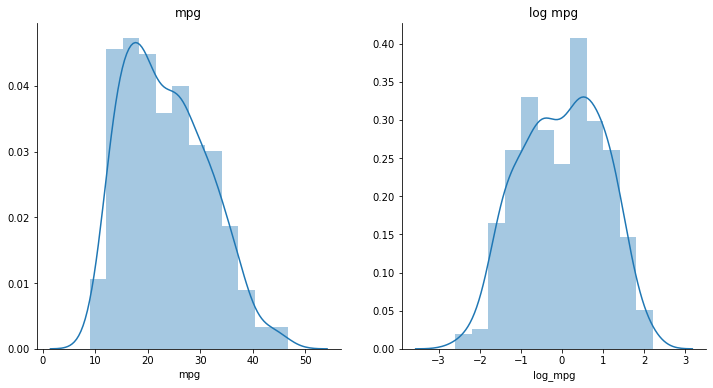

In [30]:
df = pd.read_csv('./data/auto-mpg.csv')
df['log_mpg'] = np.log(df.mpg + 1)
df['log_mpg'] = (df.log_mpg - np.mean(df.log_mpg)) / np.std(df.log_mpg)

fig, axes = plt.subplots(1,2, figsize = (12,6))

ax = plt.subplot(1,2,1)
plt.title('mpg')
sns.distplot(df.mpg, ax = ax)
sns.despine()
ax = plt.subplot(1,2,2)
plt.title('log mpg')
sns.distplot(df.log_mpg, ax = ax)
sns.despine()

And the Kolmogorov-Smirnof test now gives a p-value which is higher than the 0.05 threshold


In [31]:
stats.kstest(df.log_mpg , 'norm')

KstestResult(statistic=0.061945798813148545, pvalue=0.09465863592010251)

We can no longer reject the null hypothesis.

And the chance for the log_mpg variable to be normally distributed is higher than it was before.
